In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import re

%matplotlib inline

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
data = pd.read_json('data/nepali-movies.json')

In [3]:
data.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year
0,"Documentary, Adventure, Drama",https://www.imdb.com/title/tt1999130/,A team of 20 elite Nepali climbers venture int...,8.0,99 min,Death Zone: Cleaning Mount Everest,62.0,2018
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,7.1,138 min,Chhakka Panja 2,261.0,2017
2,Comedy,https://www.imdb.com/title/tt8393764/,When she learns about the worst condition of t...,6.5,None,Chhakka Panja 3,86.0,2018
3,"Drama, Romance",https://www.imdb.com/title/tt9812236/,Add a Plot,NaN,None,Love Station,NaN,2019
4,"Drama, History",https://www.imdb.com/title/tt3700482/,"After her husband's death, a girl is forced to...",7.6,90 min,Jhola,244.0,2013


# Genre Analysis

In [4]:
data['genre'].value_counts()

Drama                              138
Short, Drama                        58
Drama, Romance                      42
Romance                             41
Documentary                         40
Documentary, Short                  39
Short                               28
Action                              21
Short, Music                        21
Comedy                              20
Comedy, Drama                       17
Short, Musical                      13
Action, Drama                       10
Musical                              8
Short, Drama, Family                 7
Thriller                             7
Drama, Family                        7
Family                               5
Documentary, Short, Drama            5
Documentary, Short, Adventure        5
Drama, Musical                       4
Talk-Show                            4
Crime                                4
Biography                            4
Documentary, Adventure               4
Documentary, Short, Biogr

In [5]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [15, 10]

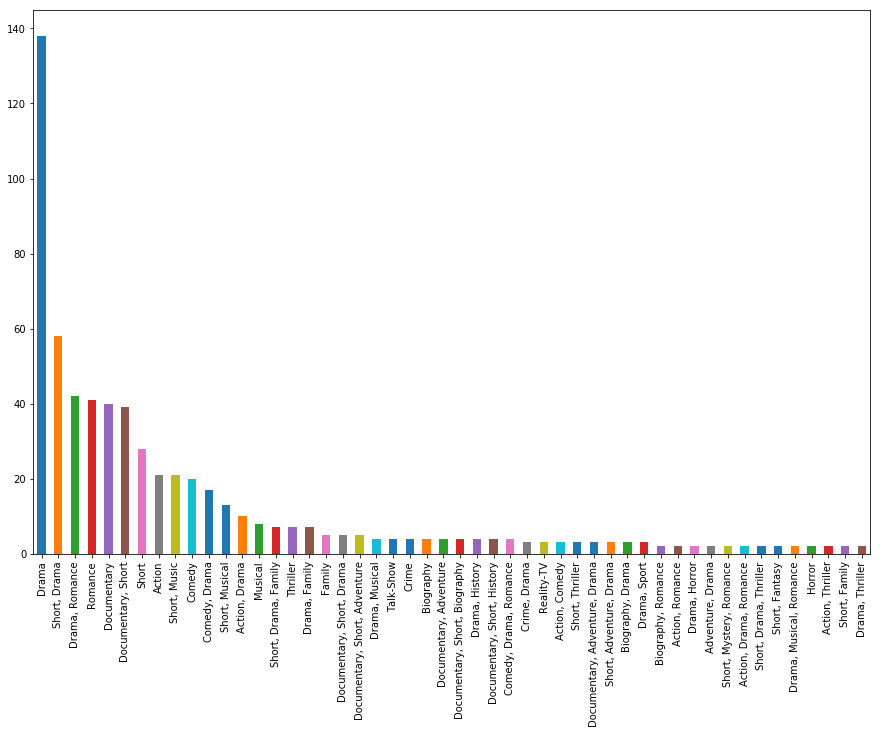

In [6]:
data['genre'].value_counts()[:50].plot('bar')

#### Simple Genre
The original data consists of multiple genre for each movie. So, here I break down them into simple (and common) genres to make the analysis efficient.

In [7]:
genre_list = ['drama', 'romance', 'comedy', 'biography', 'documentary', 'crime', 'thriller', 'action', 'music']

In [8]:
count_map = {}
for genre in genre_list:
    count_map[genre] = len(data['genre'].dropna().apply(lambda x : genre if genre in x.lower() else None).dropna())

In [9]:
count_map

{'drama': 355,
 'romance': 115,
 'comedy': 56,
 'biography': 20,
 'documentary': 119,
 'crime': 16,
 'thriller': 21,
 'action': 53,
 'music': 61}

In [10]:
types = np.array(list(count_map.keys()))
types

array(['drama', 'romance', 'comedy', 'biography', 'documentary', 'crime',
       'thriller', 'action', 'music'], dtype='<U11')

In [11]:
counts = np.array(list(count_map.values()))
counts

array([355, 115,  56,  20, 119,  16,  21,  53,  61])

In [12]:
#types[np.argsort(counts)[::-1]]

Text(0.5, 1.0, 'Nepali Movie Genre')

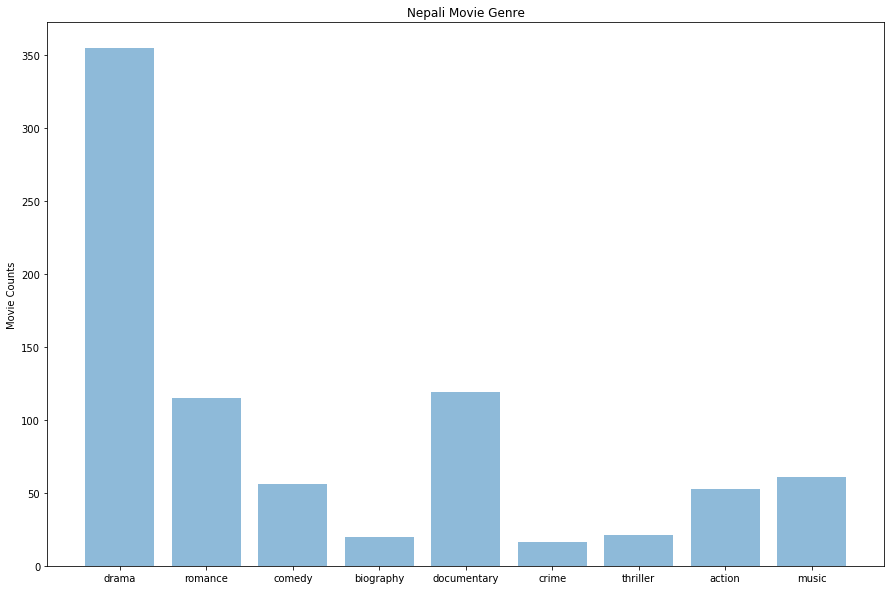

In [13]:
y_pos = np.arange(len(types))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, types)
plt.ylabel('Movie Counts')
plt.title('Nepali Movie Genre')

In [14]:
data['rating'].describe()

count    244.000000
mean       7.549590
std        1.167055
min        2.500000
25%        6.900000
50%        7.700000
75%        8.300000
max       10.000000
Name: rating, dtype: float64

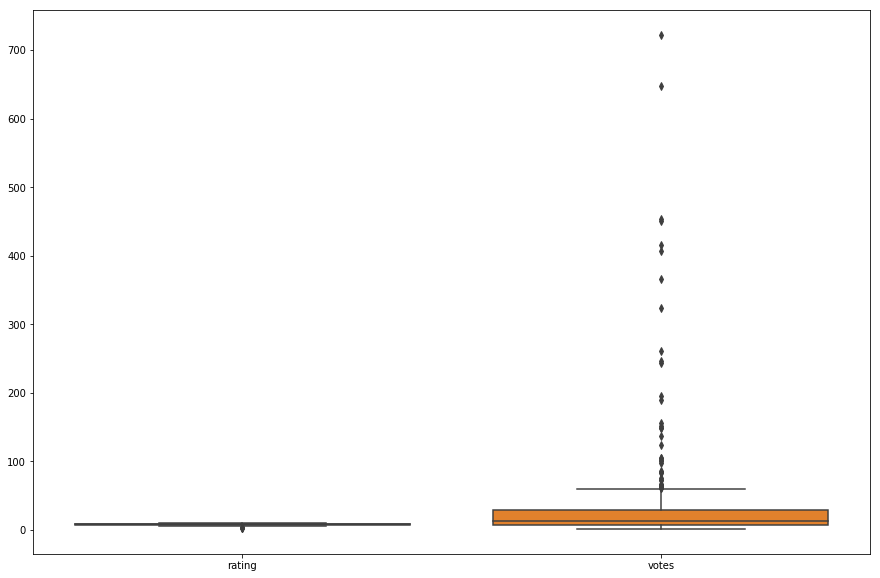

In [15]:
sns.boxplot(data=data)

# Year and Rating

Get ratings and years as they are.

In [18]:
df_rating = data[data['rating'].notnull()]
df_rating = df_rating[['rating', 'year']]
df_rating

,rating,year
0,8.0,2018
1,7.1,2017
2,6.5,2018
4,7.6,2013
5,7.3,2019
6,8.0,2018
7,7.8,2017
8,8.5,2003
9,6.4,2018
11,9.3,2019


### Get Average Rating per Year

In [19]:
df_rating_mean = df_rating.groupby('year').mean()
df_rating_mean.reset_index(inplace=True)
df_rating_mean

,year,rating
0,1964,9.100000
1,1966,9.600000
2,1973,8.600000
3,1977,9.000000
4,1978,8.100000
5,1983,7.000000
6,1984,8.350000
7,1985,7.100000
8,1987,7.750000
9,1989,7.900000


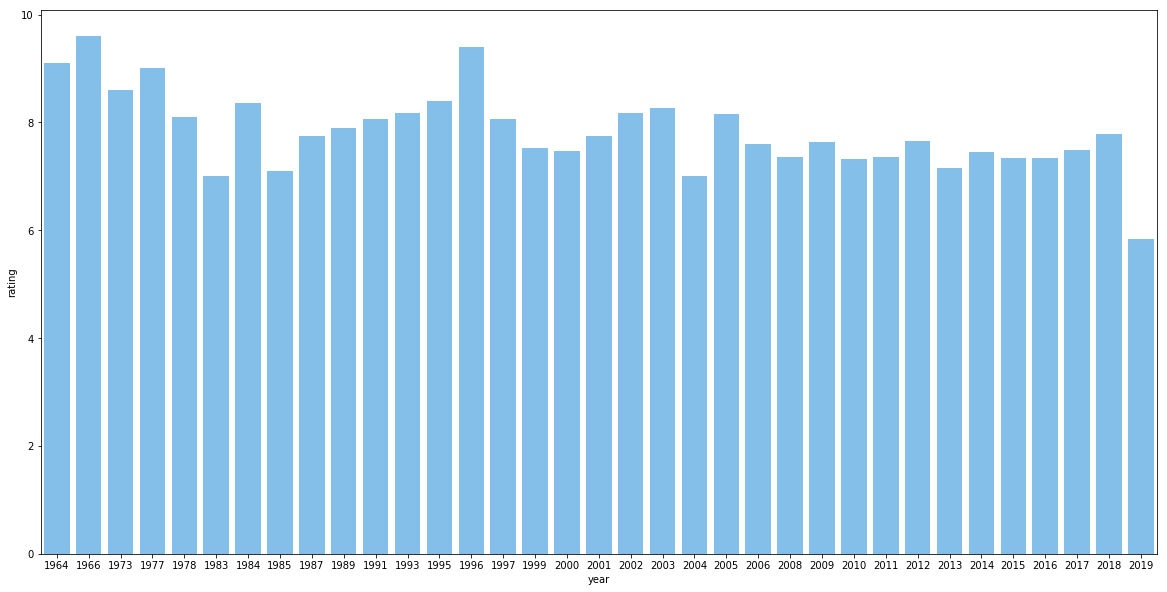

In [20]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(x='year', y='rating', data=df_rating_mean, color='#73C2FB')

In [21]:
df_rating[df_rating['year'] == 1966]

,rating,year
106,9.6,1966


In [22]:
df_rating[df_rating['year'] == 1996]

,rating,year
167,9.4,1996


In [23]:
data['rating'].mean()

7.549590163934426

In [24]:
df_rating.describe()

,rating
count,244.000000
mean,7.549590
std,1.167055
min,2.500000
25%,6.900000
50%,7.700000
75%,8.300000
max,10.000000


#### thoughts
It seems there are no drastic fluctuations in ratings based on year. The average rating till 2018 is **7.6**.
The highest ratings seem to in the year 1966 and 1996.
But that doesn't mean they are good representation for the analysis since **1996** has only one non-null rating value while **1966** has only a single movie in the database.

# Year and Movie Count

In [25]:
df_movie_count = df_rating.groupby('year').count()
df_movie_count.reset_index(inplace=True)
df_movie_count.columns = ['year', 'movie_count']
df_movie_count

,year,movie_count
0,1964,1
1,1966,1
2,1973,1
3,1977,1
4,1978,1
5,1983,1
6,1984,2
7,1985,1
8,1987,2
9,1989,1


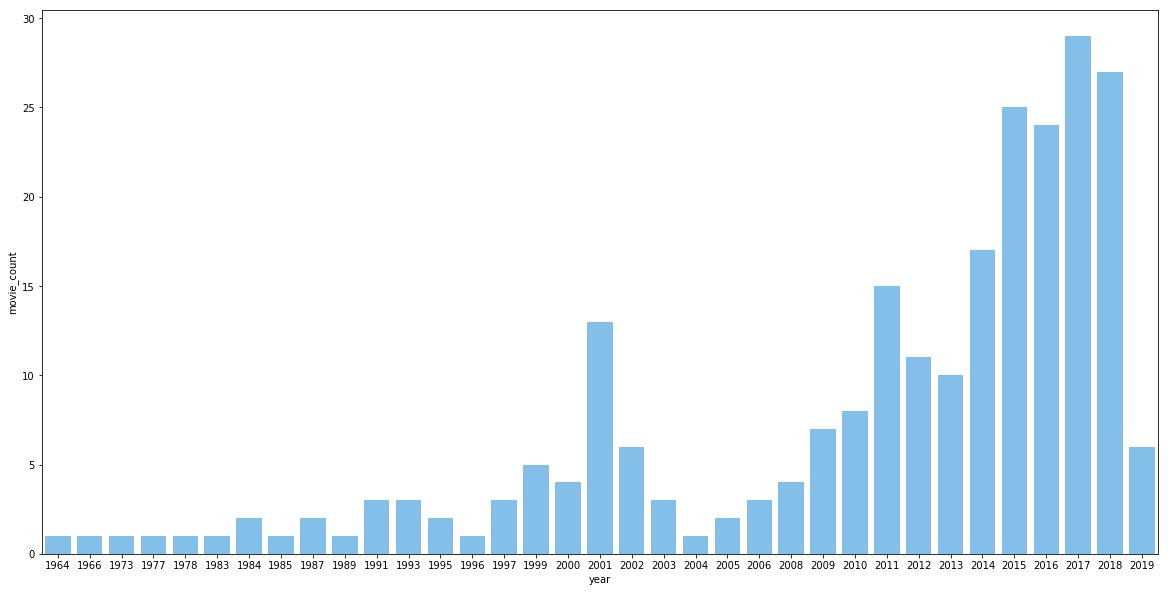

In [26]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(x='year', y='movie_count', data=df_movie_count, color='#73C2FB')

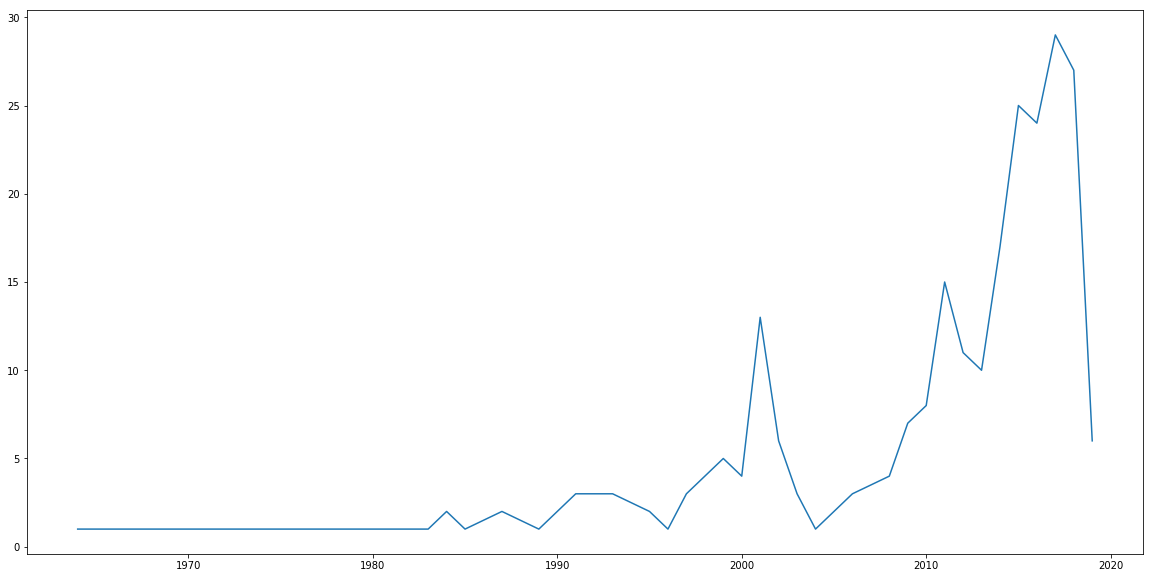

In [27]:
plt.plot(df_movie_count['year'], df_movie_count['movie_count'])

#### thoughts
It seems, the total number of Nepali movies got a big dip around the years **2001-2011** with **2004** being the lowest. Perhaps, it might be due to the [Nepalese Civil war](https://en.wikipedia.org/wiki/Nepalese_Civil_War). This is just my hypothesis for this.  
Since then, the total number of movies per year is increasing (with some minor ups and downs).

# Rating filtered by Movie Count per Year

In [32]:
# get those years having more than 2 movies
df_rating_2 = pd.concat([group for _, group in df_rating.groupby('year') if len(group) > 2])

In [31]:
df_rating_2

,rating,year
80,7.8,1991
103,8.4,1991
177,8.0,1991
158,7.8,1993
234,8.4,1993
237,8.3,1993
98,9.2,1997
417,6.8,1997
468,8.2,1997
101,7.4,1999


#### thoughts
Now, let's take only those years that have more than a single movie.

In [33]:
df_rating_mean = df_rating_2.groupby('year').mean()
df_rating_mean.reset_index(inplace=True)
df_rating_mean

,year,rating
0,1991,8.066667
1,1993,8.166667
2,1997,8.066667
3,1999,7.520000
4,2000,7.475000
5,2001,7.746154
6,2002,8.166667
7,2003,8.266667
8,2006,7.600000
9,2008,7.350000


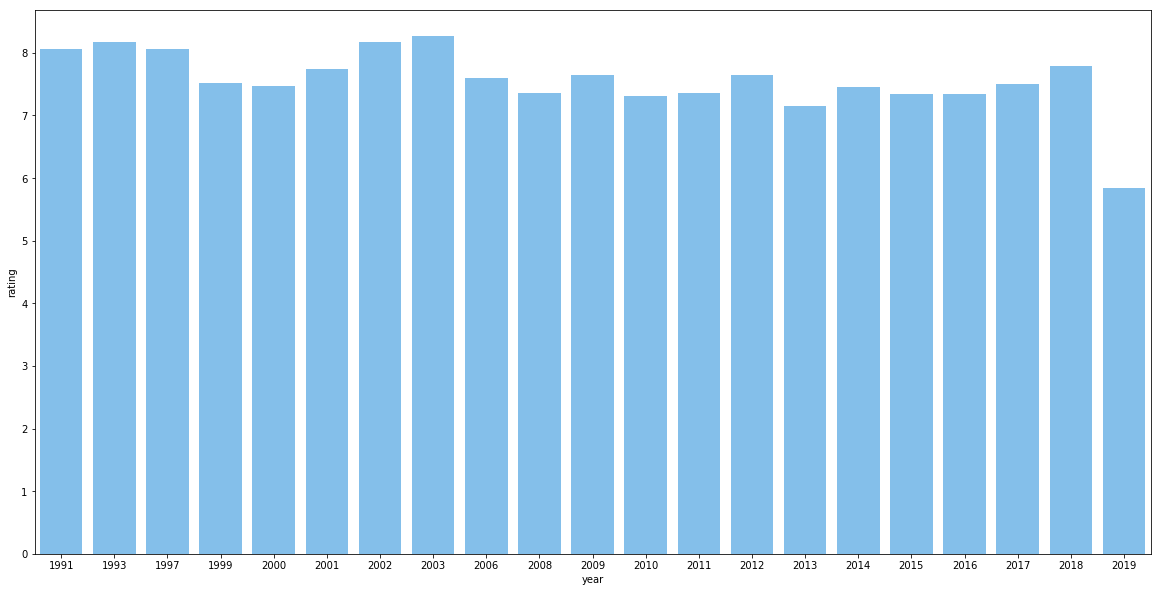

In [34]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 10]
sns.barplot(x='year', y='rating', data=df_rating_mean, color='#73C2FB')

In [35]:
df_rating_mean['rating'].describe()

count    21.000000
mean      7.560931
std       0.512984
min       5.833333
25%       7.350000
50%       7.520000
75%       7.781481
max       8.266667
Name: rating, dtype: float64

#### thoughts
From the bar plot, we can see that the average rating per year in steady throughout.     
I have no idea (at the time of writing this). :D

# Movie Runtime

In [36]:
data.isnull().sum()

genre        77
imdb_url      0
plot          0
rating      533
runtime     406
title         0
votes       533
year          3
dtype: int64

In [37]:
df_runtime = data[data['runtime'].notnull()]
df_runtime.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year
0,"Documentary, Adventure, Drama",https://www.imdb.com/title/tt1999130/,A team of 20 elite Nepali climbers venture int...,8.0,99 min,Death Zone: Cleaning Mount Everest,62.0,2018
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,7.1,138 min,Chhakka Panja 2,261.0,2017
4,"Drama, History",https://www.imdb.com/title/tt3700482/,"After her husband's death, a girl is forced to...",7.6,90 min,Jhola,244.0,2013
5,Drama,https://www.imdb.com/title/tt9333076/,An excellent portrayal of a struggle of a comm...,7.3,121 min,Gopi,7.0,2019
6,"Comedy, Drama",https://www.imdb.com/title/tt7786264/,A wedding conflict between two families.,8.0,138 min,Shatru Gate,85.0,2018


In [38]:
df_runtime['runtime'] = df_runtime['runtime'].apply(lambda x : int(re.findall(r'\d+', x)[0]))

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_runtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 774
Data columns (total 8 columns):
genre       369 non-null object
imdb_url    371 non-null object
plot        371 non-null object
rating      145 non-null float64
runtime     371 non-null int64
title       371 non-null object
votes       145 non-null float64
year        371 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 26.1+ KB


In [40]:
df_runtime.describe()

,rating,runtime,votes
count,145.000000,371.000000,145.000000
mean,7.579310,67.951482,60.544828
std,1.082685,53.231446,115.510039
min,2.900000,1.000000,1.000000
25%,7.000000,16.000000,9.000000
50%,7.600000,56.000000,19.000000
75%,8.200000,125.000000,52.000000
max,10.000000,180.000000,722.000000


#### thoughts
Average runtime is **68 minutes**.

## Runtime and Category

In [41]:
genre_list = ['drama', 'romance', 'comedy', 'biography', 'documentary', 'crime', 'thriller', 'action', 'music']

In [42]:
df = df_runtime[df_runtime['genre'].notnull()]
df.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year
0,"Documentary, Adventure, Drama",https://www.imdb.com/title/tt1999130/,A team of 20 elite Nepali climbers venture int...,8.0,99,Death Zone: Cleaning Mount Everest,62.0,2018
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,7.1,138,Chhakka Panja 2,261.0,2017
4,"Drama, History",https://www.imdb.com/title/tt3700482/,"After her husband's death, a girl is forced to...",7.6,90,Jhola,244.0,2013
5,Drama,https://www.imdb.com/title/tt9333076/,An excellent portrayal of a struggle of a comm...,7.3,121,Gopi,7.0,2019
6,"Comedy, Drama",https://www.imdb.com/title/tt7786264/,A wedding conflict between two families.,8.0,138,Shatru Gate,85.0,2018


In [43]:
df.shape

(369, 8)

In [44]:
def get_simple_genres(x, genres):
    x = x.lower()
    res = []
    for genre in genres:
        if genre in x:
            res.append(genre)
    return res if res else None

In [45]:
# extract relevant categories for a given movie based on the genre_list provided
df['genre_simple'] = df['genre'].apply(lambda x : get_simple_genres(x, genre_list))

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
df.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,genre_simple
0,"Documentary, Adventure, Drama",https://www.imdb.com/title/tt1999130/,A team of 20 elite Nepali climbers venture int...,8.0,99,Death Zone: Cleaning Mount Everest,62.0,2018,"[drama, documentary]"
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,7.1,138,Chhakka Panja 2,261.0,2017,"[drama, comedy]"
4,"Drama, History",https://www.imdb.com/title/tt3700482/,"After her husband's death, a girl is forced to...",7.6,90,Jhola,244.0,2013,[drama]
5,Drama,https://www.imdb.com/title/tt9333076/,An excellent portrayal of a struggle of a comm...,7.3,121,Gopi,7.0,2019,[drama]
6,"Comedy, Drama",https://www.imdb.com/title/tt7786264/,A wedding conflict between two families.,8.0,138,Shatru Gate,85.0,2018,"[drama, comedy]"


In [47]:
df.isnull().sum()

genre             0
imdb_url          0
plot              0
rating          225
runtime           0
title             0
votes           225
year              0
genre_simple     25
dtype: int64

In [48]:
df = df[df['genre_simple'].notnull()]
df.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,genre_simple
0,"Documentary, Adventure, Drama",https://www.imdb.com/title/tt1999130/,A team of 20 elite Nepali climbers venture int...,8.0,99,Death Zone: Cleaning Mount Everest,62.0,2018,"[drama, documentary]"
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,7.1,138,Chhakka Panja 2,261.0,2017,"[drama, comedy]"
4,"Drama, History",https://www.imdb.com/title/tt3700482/,"After her husband's death, a girl is forced to...",7.6,90,Jhola,244.0,2013,[drama]
5,Drama,https://www.imdb.com/title/tt9333076/,An excellent portrayal of a struggle of a comm...,7.3,121,Gopi,7.0,2019,[drama]
6,"Comedy, Drama",https://www.imdb.com/title/tt7786264/,A wedding conflict between two families.,8.0,138,Shatru Gate,85.0,2018,"[drama, comedy]"


In [49]:
df.shape

(344, 9)

In [50]:
df.isnull().sum()

genre             0
imdb_url          0
plot              0
rating          202
runtime           0
title             0
votes           202
year              0
genre_simple      0
dtype: int64

In [51]:
# split the list of genre for a movie into multiple rows
lst_col = 'genre_simple'
df_genre = pd.DataFrame({
         col:np.repeat(df[col].values, df[lst_col].str.len())
          for col in df.columns.difference([lst_col])
      }).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns.tolist()]

In [52]:
df_genre.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,genre_simple
0,"Documentary, Adventure, Drama",https://www.imdb.com/title/tt1999130/,A team of 20 elite Nepali climbers venture int...,8.0,99,Death Zone: Cleaning Mount Everest,62.0,2018,drama
1,"Documentary, Adventure, Drama",https://www.imdb.com/title/tt1999130/,A team of 20 elite Nepali climbers venture int...,8.0,99,Death Zone: Cleaning Mount Everest,62.0,2018,documentary
2,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,7.1,138,Chhakka Panja 2,261.0,2017,drama
3,"Comedy, Drama",https://www.imdb.com/title/tt7229666/,Chhakka Panja 2 continues with new story of Ra...,7.1,138,Chhakka Panja 2,261.0,2017,comedy
4,"Drama, History",https://www.imdb.com/title/tt3700482/,"After her husband's death, a girl is forced to...",7.6,90,Jhola,244.0,2013,drama


In [53]:
# get mean runtime for each genre
df_runtime_mean = df_genre.groupby('genre_simple').mean()
df_runtime_mean.reset_index(inplace=True)
df_runtime_mean

,genre_simple,rating,runtime,votes
0,action,7.283333,106.954545,132.500000
1,biography,7.900000,64.538462,29.333333
2,comedy,7.362500,120.212121,86.500000
3,crime,7.216667,104.833333,165.666667
4,documentary,8.107143,43.161616,63.142857
5,drama,7.617757,82.092391,64.383178
6,music,8.180000,36.275862,40.100000
7,romance,7.381579,122.000000,48.736842
8,thriller,7.340000,90.538462,174.600000


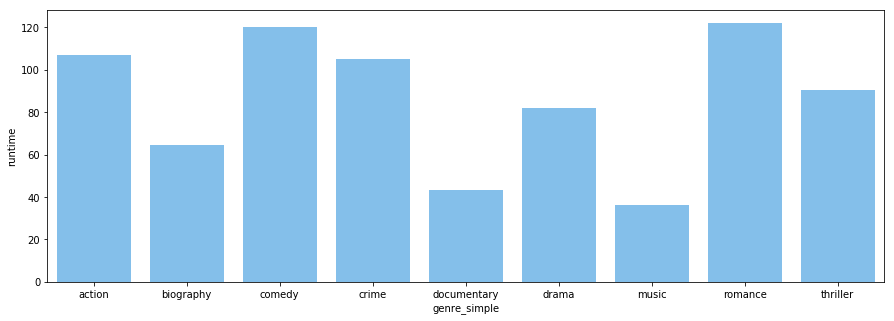

In [54]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [15, 5]
sns.barplot(x='genre_simple', y='runtime', data=df_runtime_mean, color='#73C2FB')

#### thoughts
From this, we can see that **action**, **comedy**, **romance** movies have higher runtime.  
Whereas, **music** and **documentary** movies have lower runtime.